$$\textbf{Line coding$$}$$



$$\textsf{1)   Unipolar NRZ}$$




$\textrm{Encoding:}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def unipolar_NRZ(input_stream, max_voltage, min_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0
  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(min_voltage)
    else:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(max_voltage)
    flag = flag + 1
  
  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.plot(time, voltage)
  ax.set_title('Unipolar NRZ', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  ax.set_xlabel('Time', fontsize=12)
  ax.set_ylabel('Amplitude', fontsize=12)
  plt.show()
  
  return voltage

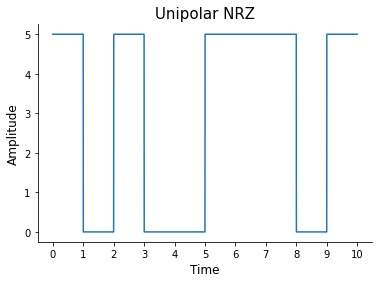

In [ ]:
input_stream = [1,0,1,0,0,1,1,1,0,1]
voltage = unipolar_NRZ(input_stream, 5, 0)

$\textrm{Decoding:}$

In [ ]:
i = 0
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == 5:
    decoded_output.append(1)
  else:
    decoded_output.append(0)
  i+=1000

print(decoded_output)

[1, 0, 1, 0, 0, 1, 1, 1, 0, 1]


$$\textsf{2) Polar NRZ-L}$$

$\textrm{Encoding:}$

In [ ]:
def polar_NRZ_L(input_stream, max_voltage, min_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0
  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(max_voltage)
    else:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(min_voltage)
    flag = flag + 1
  
  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Polar NRZ-L', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(min_voltage,max_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)

  return voltage

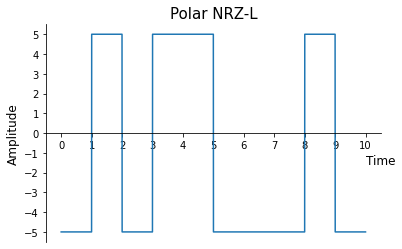

In [ ]:
input_stream = [1,0,1,0,0,1,1,1,0,1]

voltage = polar_NRZ_L(input_stream, 5, -5)

$\textrm{Decoding:}$

In [ ]:
i = 0
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == 5:
    decoded_output.append(0)
  else:
    decoded_output.append(1)
  i+=1000

print(decoded_output)

[1, 0, 1, 0, 0, 1, 1, 1, 0, 1]


$$\textsf{3) Polar NRZ-I}$$

$\textrm{Encoding:}$

In [ ]:
def polar_NRZ_I(input_stream, peak_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0
  last_voltage = peak_voltage
  
  for i in input_stream:
    if i==0 or flag==0:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(last_voltage)
    else:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(-1*last_voltage)
      last_voltage = -1*last_voltage
    flag = flag + 1      
  
  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Polar NRZ-I', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)

  return voltage

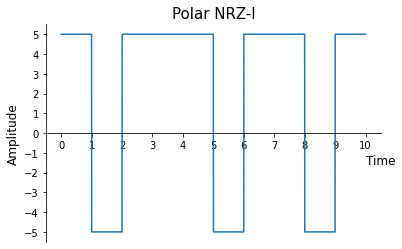

In [ ]:
input_stream = [1,1,1,0,0,1,1,0,1,1]

voltage = polar_NRZ_I(input_stream, 5)

$\textrm{Decoding:}$

In [ ]:
i = 1000
last_voltage = 5
decoded_output = [1]
while (i<len(input_stream)*1000):
  if voltage[i] == last_voltage:
    decoded_output.append(0)
  else:
    decoded_output.append(1)
    last_voltage = -1*last_voltage
  i+=1000

print(decoded_output)

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


$$\textsf{4) Polar RZ}$$

$\textrm{Encoding:}$

In [ ]:
def polar_RZ(input_stream, peak_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0

  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(-1*peak_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(0)
    else:
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(peak_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(0)
    flag = flag + 1
  
  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Polar RZ', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)

  return voltage

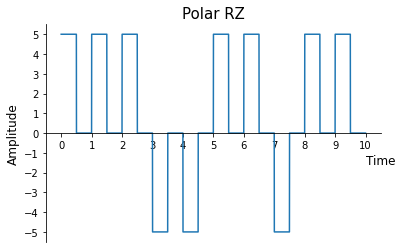

In [ ]:
input_stream = [1,1,1,0,0,1,1,0,1,1]
voltage = polar_RZ(input_stream, 5)

$\textrm{Decoding:}$

In [ ]:
i = 0
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == 5:
    decoded_output.append(1)
  else:
    decoded_output.append(0)
  i+=1000

print(decoded_output)

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


$$\textsf{5) Manchester}$$

$\textrm{Encoding:}$

In [ ]:
def manchester(input_stream, peak_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0

  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(peak_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(-1*peak_voltage)
    else:
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(-1*peak_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(peak_voltage)
    flag = flag + 1

  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Manchester', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)  

  return voltage

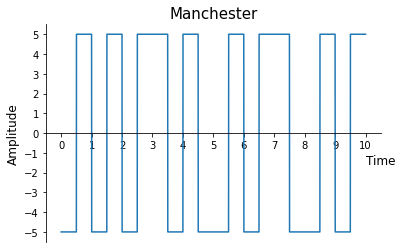

In [ ]:
input_stream = [1,1,1,0,0,1,1,0,1,1]
voltage = manchester(input_stream, 5)

$\textrm{Decoding:}$

In [ ]:
i = 0
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == 5:
    decoded_output.append(0)
  else:
    decoded_output.append(1)
  i+=1000

print(decoded_output)

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


$$\textsf{6) Differential Manchester}$$

In [ ]:
def diff_manchester(input_stream, peak_voltage):
  time = [-0.001]
  time.extend(np.arange(0, len(input_stream), 0.001)) 
  voltage = [peak_voltage]
  flag = 0
  last_voltage = -1*peak_voltage

  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(last_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(-1*last_voltage)
    else:
      last_voltage = -1*last_voltage
      for j in np.arange(flag, flag+0.5, 0.001):
        voltage.append(last_voltage)
      for j in np.arange(flag+0.5, flag+1, 0.001):
        voltage.append(-1*last_voltage)
    flag = flag + 1

  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Differential Manchester', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)  

  return voltage

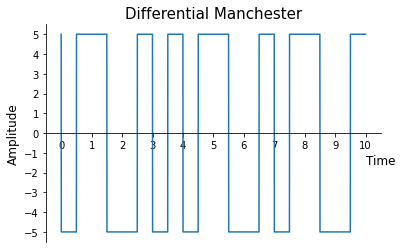

In [ ]:
input_stream = [0,1,1,0,0,1,1,0,1,1]
voltage = diff_manchester(input_stream, 5)

$$\textsf{7) Bipolar AMI}$$

$\textrm{Encoding:}$

In [ ]:
def bipolar_AMI(input_stream, peak_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0
  last_voltage = -1*peak_voltage

  for i in input_stream:
    if i==0:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(0)
    else:
      last_voltage = -1*last_voltage
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(last_voltage)

  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Bipolar AMI', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)    

  return voltage      

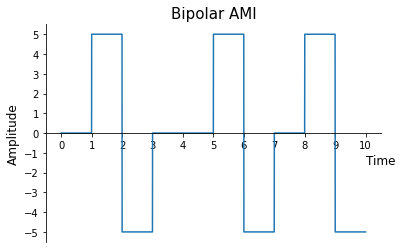

In [ ]:
input_stream = [0,1,1,0,0,1,1,0,1,1]
voltage = bipolar_AMI(input_stream, 5)

$\textrm{Decoding:}$

In [ ]:
i = 0
last_voltage = -5
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == -1*last_voltage:
    decoded_output.append(1)
    last_voltage = -1*last_voltage
  else:
    decoded_output.append(0)
  i+=1000

print(decoded_output)

[0, 1, 1, 0, 0, 1, 1, 0, 1, 1]


$$\textsf{8) Bipolar Pseudoternary}$$

$\textrm{Encoding:}$

In [ ]:
def bipolar_pseudoternary(input_stream, peak_voltage):
  time = np.arange(0, len(input_stream), 0.001)
  voltage = []
  flag = 0
  last_voltage = -1*peak_voltage

  for i in input_stream:
    if i==1:
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(0)
    else:
      last_voltage = -1*last_voltage
      for j in np.arange(flag, flag+1, 0.001):
        voltage.append(last_voltage)

  fig, ax = plt.subplots()
  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.plot(time, voltage)
  ax.set_title('Bipolar Pseudoternary', fontsize = 15)
  plt.xticks(np.arange(0, len(input_stream) + 1, 1))
  plt.yticks(np.arange(-1*peak_voltage, peak_voltage+1, 1))
  ax.set_xlabel('Time', fontsize = 12, x = 1)
  ax.set_ylabel('Amplitude', fontsize=12)  

  return voltage        

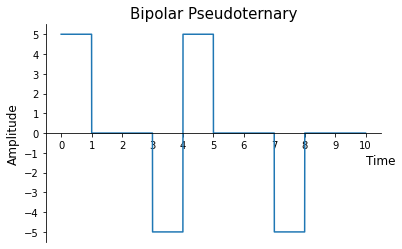

In [ ]:
input_stream = [0,1,1,0,0,1,1,0,1,1]
voltage = bipolar_pseudoternary(input_stream, 5)

$\textrm{Decoding:}$

In [ ]:
i = 0
last_voltage = -5
decoded_output = []
while (i<len(input_stream)*1000):
  if voltage[i] == -1*last_voltage:
    decoded_output.append(0)
    last_voltage = -1*last_voltage
  else:
    decoded_output.append(1)
  i+=1000

print(decoded_output)

[0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
